# MATH 210 Introduction to Mathematical Computing

## February 27, 2017

1. Approximating definite integrals by Riemann sums
2. Approximating integrals with `scipy.integrate.trapz`
3. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Approximating definite integrals with Riemann sums

The definite [integral](https://en.wikipedia.org/wiki/Integral) of a function $f(x)$ over the interval $[a,b]$ is defined as a limit of [Riemann sums](https://en.wikipedia.org/wiki/Riemann_sum)

$$
\int_a^b f(x) \, dx = \lim_{n \to \infty} \sum_{i=1}^n f(x_i^*) (x_i - x_{i-1}) \ \ , \ x_i^* \in [x_{i-1},x_i]
$$

The value $x_i^*$ chosen in each subinterval is arbitrary however there are certain obvious choices:

* A **left** Riemann sum is when each $x_i^* = x_{i-1}$ is the left endpoint of the subinterval $[x_{i-1},x_i]$
* A **right** Riemann sum is when each $x_i^* = x_i$ is the right endpoint of the subinterval $[x_{i-1},x_i]$
* A **midpoint** Riemann sum is when each $x_i^* = (x_{i-1} + x_i)/2$ is the midpoint of the subinterval $[x_{i-1},x_i]$

Let's write a function called `riemann_sum` which takes 5 input parameters `f`, `a`, `b`, `n` and `method` and returns the Riemann sum

$$
\sum_{i=1}^n f(x_i^*) (x_i - x_{i-1})
$$

where the partition $a = x_0 < x_1 < \cdots < x_n = b$ has subintervals of **equal length**, and `method` determines whether we use left endpoints, right endpoints or midpoints (with midpoints as the default method).

In [2]:
def riemann_sum(f,a,b,n,method='midpoint'):
    '''Compute the Riemann sum of f(x) over the interval [a,b]
    using a partition with n subintervals of equal length.
    
    INPUT:
        f (function) : Vectorized function of one variable
        a,b (numbers) : Endpoints of the interval [a,b]
        n (int) : Number of subintervals of equal length in the partition of [a,b]
        method (str) : Determines the kind of Riemann sum:
            right : Riemann sum using right endpoints
            left : Riemann sum using left endpoints
            midpoint (default) : Riemann sum using midpoints
            
    OUTPUT:
        Value of the Riemann sum (number)
    '''
    # Length of each subinterval
    dx = (b - a)/n
    # Array of endpoints
    x = np.linspace(a,b,n+1)
    if method == 'left':
        # Compute left Riemann sum
        # Array of left endpoints
        x = x[0:-1]
        return np.sum(f(x)*dx)
    elif method == 'right':
        # Compute right Riemann sum
        # Array of right endpoints
        x = x[1:]
        return np.sum(f(x)*dx)
    elif method == 'midpoint':
        # Compute Riemann sum with midpoints
        # Array of midpoints
        x = (x[0:-1] + x[1:])/2 # Or x = x[0:-1] + dx/2
        return np.sum(f(x)*dx)
    else:
        # Don't recognize the method
        print('Method',method,'undefined.')
        return None

Let's test out function with inputs where we know what the output should be. For example, we know $\int_0^{\pi/2} \sin(x) \, dx = 1$ and, since $\sin(x)$ is concave down on $[0,\pi/2]$, we know that left endpoints will give an over-estimate, and right endpoints will give an over-estimate.

In [3]:
riemann_sum(np.sin,0,np.pi/2,100)

1.0000102809119054

In [4]:
riemann_sum(np.sin,0,np.pi/2,100,'right')

1.0078334198735821

In [5]:
riemann_sum(np.sin,0,np.pi/2,100,'left')

0.992125456605633

We also know that $\int_0^1 x \, dx = 1/2$ and midpoint should give the result exactly:

In [6]:
def fun(x):
    return x

In [7]:
riemann_sum(fun,0,1,100)

0.5

One last extreme example: we know that if we choose $f(x) = \cos(x)$ over the interval $[0,\pi/2]$ with one subinterval then the Riemann sum with midpoints gives

$$
\cos(\pi/4) \frac{\pi}{2} = \frac{\pi}{2 \sqrt{2}}
$$

In [8]:
riemann_sum(np.cos,0,np.pi/2,1)

1.1107207345395915

In [9]:
1/2**0.5 * np.pi/2

1.1107207345395915

## 2. Integration using scipy.integrate

The SciPy library has a package [scipy.integrate](https://docs.scipy.org/doc/scipy-0.18.1/reference/integrate.html) for approximating definite integrals and numerically solving differential equations. We will start by using the simplest function for approximating definite integrals: the trapezoid rule.

### Trapezoid rule

The [trapezoid rule](https://en.wikipedia.org/wiki/Trapezoidal_rule) is similar to Riemann sums but instead of computing the area of a reactangle over each subinterval we compute the area of the trapezoid connecting the points $(x_{i-1},0)$, $(x_i,0)$, $(x_{i-1},f(x_{i-1}))$ and $(x_i,f(x_i))$. For a partitition $a = x_0 < x_1 < \cdots < x_n = b$ the formula is

$$
\int_a^b f(x) \, dx \approx \frac{1}{2} \sum_{i = 1}^n \left( f(x_i) + f(x_{i-1}) \right) ( x_i - x_{i-1} )
$$

Let's write a function called `my_trapz` which 2 input parameters $x$ and $y$ (NumPy arrays which defined points on the curve to integrate) and returns the approximation of the integral by the trapezoid rule.

In [10]:
def my_trapz(y,x):
    '''Compute the trapezoid rule given function values defined by the arrays x and y.'''
    return np.sum((y[1:] + y[0:-1])*(x[1:] - x[0:-1])) * 0.5

Let's test our function on something we know. For example, we know $\int_0^1 e^{-x} \, dx = \left( 1 - \frac{1}{e} \right)$

In [11]:
x = np.linspace(0,1,100)
y = np.exp(-x)
my_trapz(y,x)

0.6321259334458067

In [12]:
1 - np.exp(-1)

0.63212055882855767

### `scipy.integrate.trapz`

Let's import the `scipy.integrate` packages from the SciPy library and use the `trapz` function to approximate definite integrals.

In [13]:
import scipy.integrate as spi

Let's look at the documentation to see how the function works:

In [14]:
spi.trapz?

All we need to do is create arrays $x$ and $y$ for a given function just like our function `my_trapz` above.

**Example.** Let's approximate $\int_0^{\pi} e^{\sin(x)} dx$ using `trapz`.

In [15]:
x = np.linspace(0,np.pi,100)
y = np.exp(np.sin(x))

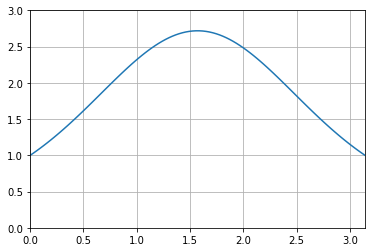

In [16]:
plt.plot(x,y), plt.xlim([0,np.pi]), plt.ylim([0,3]), plt.grid('on');

In [17]:
spi.trapz(y,x)

6.2085902024225117

**Example.** Let's use `trapz` to verify the famous formula

$$
\int_{-\infty}^{\infty} e^{-x^2} dx = \sqrt{\pi}
$$

In [18]:
x = np.linspace(-1000,1000,2000000)
y = np.exp(-x**2)

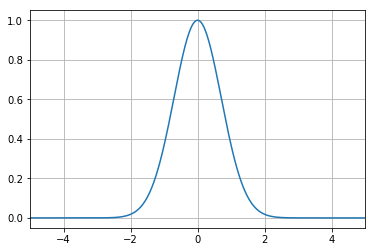

In [19]:
plt.plot(x,y), plt.xlim([-5,5]), plt.grid('on');

In [20]:
spi.trapz(y,x)

1.7724538509055159

In [21]:
np.pi**0.5

1.7724538509055159

## 3. Exercises

**Exercise.** Use `trapz` to approximate the integral and compare to the exact value

$$
\int_0^1 x e^{-x^2} \, dx = \frac{1}{2} \left( 1 - \frac{1}{e} \right)
$$

**Exercise.** Use `trapz` to approximate the left side of the integral equation

$$
\int_0^1 \ln(x) \ln(1-x) \, dx = 2 - \frac{\pi^2}{6}
$$

and compare with the right side. (Note that this is an improper integral since the integrand is not defined at 0 nor 1. To use `trapz`, consider using an array of $x$ values over an interval such as $[0.0001,0.9999]$.)

**Exercise.** Use `trapz` to approximate the left side of the integral equation

$$
\int_0^{\pi/2} \frac{x^3 \cos x}{\sin^3 x} \, dx = \frac{3}{2} \pi \ln 2 - \frac{\pi^3}{16}
$$

and compare the exact value on the right side. (Note this is an improper integral since the integrand is not defined at $x=0$. Try using an interval such as $[0.0001,\pi/2]$.)